In [106]:
import pandas as pd
import math as m
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Section I

## Question 1

#### Composite Trapezoidal Rule

In [2]:
x = sp.symbols('x')
func = (x**2)*sp.ln(x**2+1)
f = sp.lambdify(x, func)
h = 0.25
xValues = list(np.arange(0, 2.1, h))
yValues = [h*f(x_i) for x_i in xValues]
yValues[0] = 0.5*yValues[0]
yValues[-1] = 0.5*yValues[0-1]
approxArea = sum(yValues)
print(approxArea)

3.159475674259824


#### Composite Simpon's Rule

In [3]:
def pX_lagrangeIntegral(x0,x1,x2,fX):
    x = sp.symbols('x')
    p0X = (((x-x1)*(x-x2))/((x0-x1)*(x0-x2)))*fX(x0)
    p1X = (((x-x0)*(x-x2))/((x1-x0)*(x1-x2)))*fX(x1)
    p2X = (((x-x0)*(x-x1))/((x2-x0)*(x2-x1)))*fX(x2)

    pX_raw = p0X+p1X+p2X
    pX = sp.simplify(pX_raw)

    integralOfpX = sp.integrate(pX,(x,x0,x2))
    return integralOfpX
def fX(x):
    value = (x**2)*m.log((x**2)+1)
    return value
    
n = int((2 - 0) / h)
points = list(np.linspace(0, 2, n + 1))
threePointGroups = [points[i:i+3] for i in range(0,len(points),2)][0:-1]
simpsonRuleSum = sum([pX_lagrangeIntegral(threePoints[0],threePoints[1],threePoints[2],fX) for threePoints in threePointGroups])
print(simpsonRuleSum)

3.10933712650888


#### Composite Midpoint Rule

In [4]:
def calculateMidPoint(x0,x1,fX):
    midpoint = (x1+x0)/2
    return fX(midpoint)
twoPointGroups = [points[i:i+2] for i in range(0,len(points))][0:-1]
midpointRuleSum = h*sum([calculateMidPoint(twoPointGroup[0],twoPointGroup[1],fX) for twoPointGroup in twoPointGroups])
midpointRuleSum

3.084202849079324

## Question 2

#### Composite Trapezoidal Rule

In [5]:
def compositeTrapizoidalRule(nPoints,a,b):
    points = list(np.linspace(a, b, nPoints + 1))
    distance = points[1]-points[0]
    yValues = [distance*f(x_i) for x_i in points]
    yValues[0] = 0.5*yValues[0]
    yValues[-1] = 0.5*yValues[-1]
    approxArea = sum(yValues)

    return approxArea, distance

def compositeTrapizoidalRuleWTOL(tol,f):
    iterationPreviousAreas = []
    iterationForwardAreas = []
    distancePrevious = []
    distanceForward = []
    errorProduced = []
    distancesBetweenAreas = []
    
    n = 1
    while True:
        areaTrap1,distance1 = compositeTrapizoidalRule(n,0,2)
        iterationPreviousAreas.append(areaTrap1)
        distancePrevious.append(distance1)
        
        m = n+1
        areaTrap2,distance2 = compositeTrapizoidalRule(m,0,2)
        iterationForwardAreas.append(areaTrap2)
        distanceForward.append(distance2)

        error = abs(areaTrap1-areaTrap2)
        errorProduced.append(error)
        
        if error <= tol:
            break
        n+=1
    return iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward

def f(x):
    return 1/(x+4)

In [6]:
iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward = compositeTrapizoidalRuleWTOL(10**(-5),f)
trapZoid = {
    "Area_n": iterationPreviousAreas,
    "Area_n+1": iterationForwardAreas,
    "error": errorProduced,
    "h_n": distancePrevious,
    "h_n+1": distanceForward
}

trapZoidDF = pd.DataFrame(trapZoid)

In [7]:
trapZoidDF

,Area_n,Area_n+1,error,h_n,h_n+1
0,0.416667,0.408333,0.008333,2.000000,1.000000
1,0.408333,0.406746,0.001587,1.000000,0.666667
2,0.406746,0.406187,0.000559,0.666667,0.500000
3,0.406187,0.405927,0.000259,0.500000,0.400000
4,0.405927,0.405786,0.000141,0.400000,0.333333
5,0.405786,0.405701,0.000085,0.333333,0.285714
6,0.405701,0.405646,0.000055,0.285714,0.250000
7,0.405646,0.405608,0.000038,0.250000,0.222222
8,0.405608,0.405581,0.000027,0.222222,0.200000
9,0.405581,0.405561,0.000020,0.200000,0.181818


#### Composite Simpson's Rule

In [8]:
def defPoints(a,b,n):
    points = list(np.linspace(a, b,2*n+1))
    distance = points[1]-points[0]
    threePointGroups = [points[i:i+3] for i in range(0,len(points),2)][0:-1]
    return threePointGroups, distance
    
def compositeSimpsonsRuleWTOL(tol,f):
    iterationPreviousAreas = []
    iterationForwardAreas = []
    distancePrevious = []
    distanceForward = []
    errorProduced = []
    distancesBetweenAreas = []
    
    n = 1
    while True:
        threePointGroups1,distance1 = defPoints(0,2,n)
        simpsonRuleSum1 = sum([pX_lagrangeIntegral(threePoints[0],threePoints[1],threePoints[2],f) for threePoints in threePointGroups1])
    
        iterationPreviousAreas.append(simpsonRuleSum1)
        distancePrevious.append(distance1)
        
        m = n+1
        threePointGroups2,distance2 = defPoints(0,2,m)
        simpsonRuleSum2 = sum([pX_lagrangeIntegral(threePoints[0],threePoints[1],threePoints[2],f) for threePoints in threePointGroups2])
        
        iterationForwardAreas.append(simpsonRuleSum2)
        distanceForward.append(distance2)

        error = abs(simpsonRuleSum1-simpsonRuleSum2)
        errorProduced.append(error)
        
        if error <= tol:
            break
        n+=1
    return iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward

In [9]:
iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward = compositeSimpsonsRuleWTOL(10**(-5),f)
homerSimpsons = {
    "Area_n": iterationPreviousAreas,
    "Area_n+1": iterationForwardAreas,
    "error": errorProduced,
    "h_n": distancePrevious,
    "h_n+1": distanceForward
}

homerSimpsonsDF = pd.DataFrame(homerSimpsons)

In [10]:
homerSimpsonsDF

,Area_n,Area_n+1,error,h_n,h_n+1
0,0.405555555555556,0.405471380471380,8.41750841751865e-5,1.0,0.500000
1,0.405471380471380,0.405466374584021,5.00588735935503e-6,0.5,0.333333


#### Composite Midpoint Rule

In [11]:
def defPointsMID(a,b,n):
    points = list(np.linspace(a, b,n+1))
    distance = points[1]-points[0]
    twoPointGroups = [points[i:i+2] for i in range(0,len(points))][0:-1]
    return twoPointGroups, distance

def compositeMidpointRuleWTOL(tol,f):
    iterationPreviousAreas = []
    iterationForwardAreas = []
    distancePrevious = []
    distanceForward = []
    errorProduced = []
    distancesBetweenAreas = []
    
    n = 1
    while True:
        twoPointGroups1,distance1 = defPointsMID(0,2,n)
        midRuleSum1 = distance1*sum([calculateMidPoint(twoPointGroup[0],twoPointGroup[1],f) for twoPointGroup in twoPointGroups1])
    
        iterationPreviousAreas.append(midRuleSum1)
        distancePrevious.append(distance1)
        
        m = n+1
        twoPointGroups2,distance2 = defPointsMID(0,2,m)
        midRuleSum2 = distance2*sum([calculateMidPoint(twoPointGroup[0],twoPointGroup[1],f) for twoPointGroup in twoPointGroups2])
        
        iterationForwardAreas.append(midRuleSum2)
        distanceForward.append(distance2)

        error = abs(midRuleSum1-midRuleSum2)
        errorProduced.append(error)
        
        if error <= tol:
            break
        n+=1
    return iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward

In [12]:
iterationPreviousAreas,iterationForwardAreas,errorProduced,distancePrevious,distanceForward = compositeMidpointRuleWTOL(10**(-5),f)
midRule = {
    "Area_n": iterationPreviousAreas,
    "Area_n+1": iterationForwardAreas,
    "error": errorProduced,
    "h_n": distancePrevious,
    "h_n+1": distanceForward
}

midRuleDF = pd.DataFrame(midRule)

In [13]:
midRuleDF

,Area_n,Area_n+1,error,h_n,h_n+1
0,0.400000,0.404040,0.004040,2.000000,1.000000
1,0.404040,0.404827,0.000786,1.000000,0.666667
2,0.404827,0.405105,0.000278,0.666667,0.500000
3,0.405105,0.405234,0.000129,0.500000,0.400000
4,0.405234,0.405305,0.000070,0.400000,0.333333
5,0.405305,0.405347,0.000043,0.333333,0.285714
6,0.405347,0.405375,0.000028,0.285714,0.250000
7,0.405375,0.405394,0.000019,0.250000,0.222222
8,0.405394,0.405407,0.000014,0.222222,0.200000
9,0.405407,0.405417,0.000010,0.200000,0.181818


## Question 3

#### Gauss Quadrature n=2

In [14]:
def gaussQuad(a,b,n,f):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    nodes = nodes.tolist()
    weights = weights.tolist()

    scalarMultiplier = (b-a)/2
    mappedNodes = [((b-a)/2)*xi+((b+a)/2) for xi in nodes]
    getFunctionValues = [f(xi) for xi in mappedNodes]
    
    weightWithFunc = list(zip(weights, getFunctionValues))
    multiplyWeightAndFunc = sum([w * funcVal for w, funcVal in weightWithFunc])
    multiplyWeightAndFuncWithScalar = scalarMultiplier*multiplyWeightAndFunc

    return multiplyWeightAndFuncWithScalar
def g(x):
    return (x**2)*((m.e)**x)

In [15]:
integralGaussValue = gaussQuad(0,1,2,g)
integralGaussValue

0.7119417742422697

## Question 4

In [16]:
def mappingValues(b,a,f,nodes,weights,otherVar):
    scalarMultiplier = (b-a)/2
    mappedNodes = [((b-a)/2)*xi+((b+a)/2) for xi in nodes]
    getFunctionValues = [f.subs(otherVar, xi) for xi in mappedNodes]

    weightWithFunc = list(zip(weights, getFunctionValues))
    multiplyWeightAndFunc = sum([w * funcVal for w, funcVal in weightWithFunc])
    multiplyWeightAndFuncWithScalar = scalarMultiplier*multiplyWeightAndFunc

    result = sp.simplify(multiplyWeightAndFuncWithScalar)

    return result

def gaussQuadDouble(n):
    x, y = sp.symbols('x y')
    f = x**2 + sp.sqrt(y)
    
    nodes, weights = np.polynomial.legendre.leggauss(n)
    nodes = nodes.tolist()
    weights = weights.tolist()

    newFunction = mappingValues(x,0,f,nodes,weights,y)

    b=1.5
    a=1
    
    scalarMultiplier = (b-a)/2
    mappedNodes = [((b-a)/2)*xi+((b+a)/2) for xi in nodes]
    getFunctionValues = [newFunction.subs(x, xi) for xi in mappedNodes]
    
    weightWithFunc = list(zip(weights, getFunctionValues))
    multiplyWeightAndFunc = sum([w * funcVal for w, funcVal in weightWithFunc])
    multiplyWeightAndFuncWithScalar = scalarMultiplier*multiplyWeightAndFunc
    
    return multiplyWeightAndFuncWithScalar

In [17]:
print(gaussQuadDouble(4))

1.48462057710979


## Question 5

Show that the following ordinary differential equation
$$y'=y\cos(t) \text{, }\hspace{0.2cm}0\leq t \leq 1 \text{, }\hspace{0.2cm}y(0)=1$$
has a unique solution.

PF:
Applying the Mean value theorem to
$$f(t,y) = y\cos(t)$$
when $y_1 < y_2$ there exists a number $c\in(y_1,y_2)$ exists with
$$\frac{f(t,y_2)-f(t,y_1)}{y_2-y_1} = \frac{\partial}{\partial y} f(t,c) = \cos(c)$$
thus,
$$|f(t,y_2)-f(t,y_1)|= |y_2-y_1| |\cos(c)|\leq1|y_2-y_1|$$
the $f$ satisfies a Lipschitz condition in the variable $y$ with Lipschitz constant $L=1$.

Additionally, it $f(t,y)$ is continuous when $0\leq t \leq 1$ and $-\infty\leq y \leq \infty$, to the theorem implies that a unique solution exists to this initial value problem.

# Section II

In [22]:
x, y = sp.symbols('x y')
diff_eq = (2-2*x*y)/(1+x**2)
og_func = (2*x+1)/(1+x**2)

In [54]:
def euler_method(diff_eq,h,interval,y_0=1,x_0=0):
    n_points = int((interval[-1] - interval[0]) / h) + 1
    x_points = np.linspace(interval[0],interval[-1],n_points)
    y_vals = [y_0]
    for i in range(n_points-1):
        y_1 = h*float(diff_eq.subs({x: x_points[i], y: y_vals[i]}))+y_vals[i]
        y_vals.append(y_1)
    return y_vals
all_y_points_euler = euler_method(diff_eq,0.1,(0,1))

In [55]:
def midpoint_method(diff_eq,h,interval,y_0=1,x_0=0):
    n_points = int((interval[-1] - interval[0]) / h) + 1
    x_points = np.linspace(interval[0],interval[-1],n_points)
    y_vals = [y_0]
    for i in range(n_points-1):
        k_1 = float(diff_eq.subs({x: x_points[i], y: y_vals[i]}))
        k_2 = float(diff_eq.subs({x: x_points[i]+(h/2), y: y_vals[i]+(h/2)*k_1}))
        y_1 = h*k_2+y_vals[i]
        y_vals.append(y_1)
    return y_vals
all_y_points_midPoint = midpoint_method(diff_eq,0.1,(0,1))

In [56]:
def modified_euler_method(diff_eq,h,interval,y_0=1,x_0=0):
    n_points = int((interval[-1] - interval[0]) / h) + 1
    x_points = np.linspace(interval[0],interval[-1],n_points)
    y_vals = [y_0]
    for i in range(n_points-1):
        k_1 = float(diff_eq.subs({x: x_points[i], y: y_vals[i]}))
        k_2 = float(diff_eq.subs({x: x_points[i]+h, y: y_vals[i]+h*k_1}))
        average_k = (k_1+k_2)/2
        y_1 = h*average_k+y_vals[i]
        y_vals.append(y_1)
    return y_vals
all_y_points_modified_euler_method = modified_euler_method(diff_eq,0.1,(0,1))

In [57]:
def rugna_kunta_4_method(diff_eq,h,interval,y_0=1,x_0=0):
    n_points = int((interval[-1] - interval[0]) / h) + 1
    x_points = np.linspace(interval[0],interval[-1],n_points)
    y_vals = [y_0]
    for i in range(n_points-1):
        k_1 = float(diff_eq.subs({x: x_points[i], y: y_vals[i]}))
        k_2 = float(diff_eq.subs({x: x_points[i]+(h/2), y: y_vals[i]+(h/2)*k_1}))
        k_3 = float(diff_eq.subs({x: x_points[i]+(h/2), y: y_vals[i]+(h/2)*k_2}))
        k_4 = float(diff_eq.subs({x: x_points[i]+h, y: y_vals[i]+h*k_3}))
        y_1 = ((h/6)*(k_1+2*k_2+2*k_3+k_4))+y_vals[i]
        y_vals.append(y_1)
    return y_vals
all_y_points_rugna_kunta = rugna_kunta_4_method(diff_eq,0.1,(0,1))

In [66]:
h = 0.1
n_points = int(1 / h)
x_points = np.linspace(0, 1, n_points)
x_points = np.append(x_points, x_points[-1] + h)

og_y_func_points = []
for xi in x_points:
    yi = og_func.subs(x,xi)
    og_y_func_points.append(yi)

diff_eq_y_outcomes = {
    "x":x_points,
    "OG Function":og_y_func_points,
    "Euler":all_y_points_euler,
    "Midpoint":all_y_points_midPoint,
    "Modified Euler":all_y_points_modified_euler_method,
    "Runge-Kutta":all_y_points_rugna_kunta
}
diff_eq_y_outcomes_df = pd.DataFrame(diff_eq_y_outcomes)
diff_eq_y_outcomes_df

,x,OG Function,Euler,Midpoint,Modified Euler,Runge-Kutta
0,0.000000,1.00000000000000,1.000000,1.000000,1.000000,1.000000
1,0.111111,1.20731707317073,1.200000,1.188529,1.187129,1.188119
2,0.222222,1.37647058823529,1.374257,1.346697,1.344353,1.346154
3,0.333333,1.50000000000000,1.513709,1.468252,1.465527,1.467889
4,0.444444,1.57731958762887,1.613872,1.551663,1.549061,1.551723
5,0.555556,1.61320754716981,1.674984,1.599403,1.597266,1.599999
6,0.666667,1.61538461538462,1.700985,1.616526,1.615016,1.617645
7,0.777778,1.59230769230769,1.697957,1.609190,1.608321,1.610736
8,0.888889,1.55172413793103,1.672646,1.583522,1.583221,1.585364
9,1.000000,1.50000000000000,1.631412,1.544955,1.545108,1.546960


# Section III

In [99]:
u1,u2,u3,t = sp.symbols("u1 u2 u3 t")
diff_eq_1 = u1+2*u2-2*u3+np.e**t
diff_eq_2 = u2+u3-2*np.e**t
diff_eq_3 = u1+2*u2+np.e**t
symbols_used = [t,u1,u2,u3]
diff_eqs = [diff_eq_1,diff_eq_2,diff_eq_3]
y_0 = [3,-1,1]

In [100]:
def runge_kutta_4_system(diff_eqs, symbols, h, interval, y_0):
    t = symbols[0]
    u_syms = symbols[1:]

    n_points = int((interval[-1] - interval[0]) / h) + 1
    t_points = np.linspace(interval[0], interval[-1], n_points)
    u_vals = [np.array(y_0, dtype=float)]

    for i in range(n_points - 1):
        t_i = t_points[i]
        u_i = u_vals[-1]
        subs = lambda t_val, u_val: dict(zip([t] + u_syms, [t_val] + list(u_val)))

        k_1 = np.array([float(eq.subs(subs(t_i,u_i))) for eq in diff_eqs])
        k_2 = np.array([float(eq.subs(subs(t_i+(h/2),u_i+(h/2)*k_1))) for eq in diff_eqs])
        k_3 = np.array([float(eq.subs(subs(t_i+(h/2),u_i+(h/2)*k_2))) for eq in diff_eqs])
        k_4 = np.array([float(eq.subs(subs(t_i+h,u_i+h*k_3))) for eq in diff_eqs])
        
        u_1 = ((h/6)*(k_1+2*k_2+2*k_3+k_4))+u_i
        u_vals.append(u_1)
    return t_points,u_vals

In [101]:
t_points,runge_kutta_4_system_ans = runge_kutta_4_system(diff_eqs, symbols_used, 0.1, (0,1), y_0)

In [102]:
runge_kutta_4_system_ans

[array([ 3., -1.,  1.]),
 array([ 2.96434546, -1.2112465 ,  1.18326164]),
 array([ 2.85486541, -1.45070196,  1.32544091]),
 array([ 2.66800445, -1.72875233,  1.41350099]),
 array([ 2.4004914 , -2.05863242,  1.4318336 ]),
 array([ 2.04932052, -2.45705237,  1.36166904]),
 array([ 1.61172474, -2.94496184,  1.18034677]),
 array([ 1.08514047, -3.54848309,  0.86041523]),
 array([ 0.46716379, -4.30005061,  0.3685227 ]),
 array([-0.2445022 , -5.23980395, -0.33594707]),
 array([-1.05210926, -6.41729036, -1.30255158])]

In [103]:
og_eq_u1 = -3*sp.E**(-t)-3*sp.sin(t)+6*sp.cos(t)
og_eq_u2 = (3/2)*sp.E**(-t)+(3/10)*sp.sin(t)-(21/10)*sp.cos(t)-(2/5)*sp.E**(2*t)
og_eq_u3 = -sp.E**(-t)+(12/5)*sp.cos(t)+(9/5)*sp.sin(t)-(2/5)*sp.E**(2*t)

og_eq_u1_point=[]
og_eq_u2_point=[]
og_eq_u3_point=[]

og_eq_u1_point=[float(og_val) for og_val in og_eq_u1_point]
og_eq_u2_point=[float(og_val) for og_val in og_eq_u2_point]
og_eq_u3_point=[float(og_val) for og_val in og_eq_u3_point]

for ti in t_points:
    u1_s = og_eq_u1.subs(t,ti)
    u2_s = og_eq_u2.subs(t,ti)
    u3_s = og_eq_u3.subs(t,ti)
    og_eq_u1_point.append(u1_s)
    og_eq_u2_point.append(u2_s)
    og_eq_u3_point.append(u3_s)

In [104]:
rk_eq_u1_point = np.transpose(runge_kutta_4_system_ans)[0].tolist()
rk_eq_u2_point = np.transpose(runge_kutta_4_system_ans)[1].tolist()
rk_eq_u3_point = np.transpose(runge_kutta_4_system_ans)[2].tolist()

t_points = t_points.tolist()

rk_eq_u1_point = [float(rk_val) for rk_val in rk_eq_u1_point]
rk_eq_u2_point = [float(rk_val) for rk_val in rk_eq_u2_point]
rk_eq_u3_point = [float(rk_val) for rk_val in rk_eq_u3_point]

t_points = [float(t_val) for t_val in t_points]

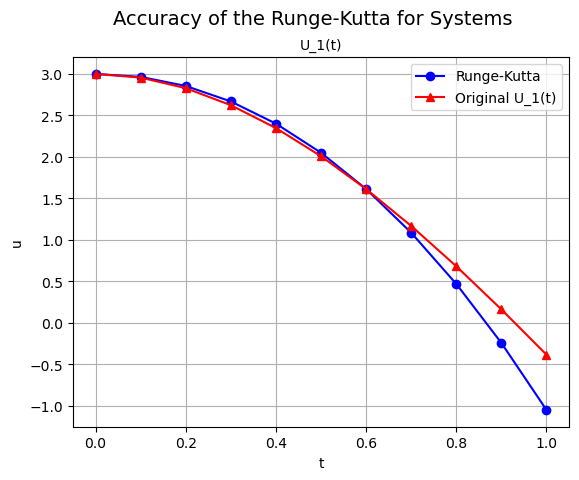

In [109]:
plt.plot(t_points, rk_eq_u1_point, 'bo-', label='Runge-Kutta')
plt.plot(t_points, og_eq_u1_point, 'r^-', label='Original U_1(t)')
plt.xlabel('t')
plt.ylabel('u')
plt.suptitle('Accuracy of the Runge-Kutta for Systems',fontsize=14)
plt.title("U_1(t)",fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

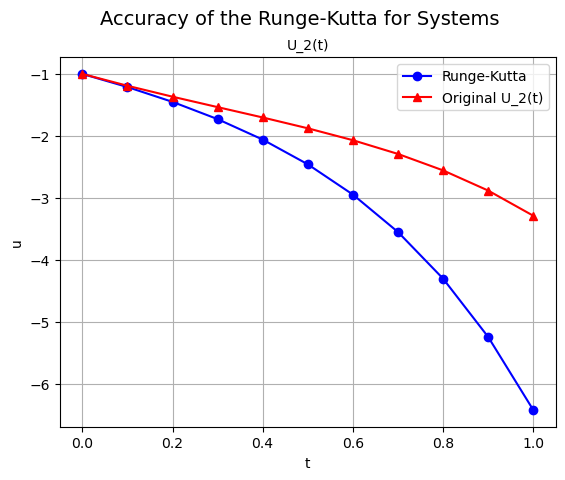

In [110]:
plt.plot(t_points, rk_eq_u2_point, 'bo-', label='Runge-Kutta')
plt.plot(t_points, og_eq_u2_point, 'r^-', label='Original U_2(t)')
plt.xlabel('t')
plt.ylabel('u')
plt.suptitle('Accuracy of the Runge-Kutta for Systems',fontsize=14)
plt.title("U_2(t)",fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

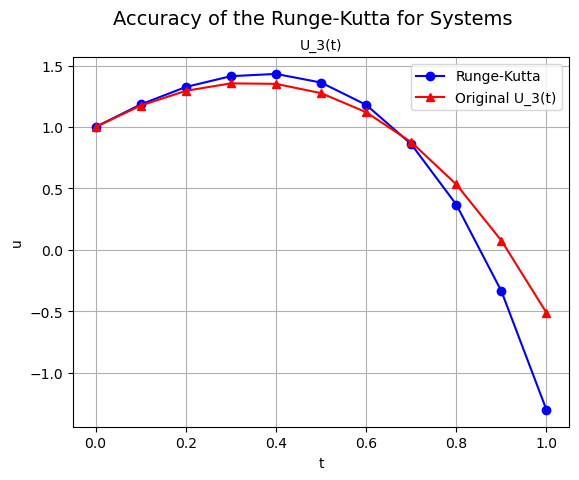

In [111]:
plt.plot(t_points, rk_eq_u3_point, 'bo-', label='Runge-Kutta')
plt.plot(t_points, og_eq_u3_point, 'r^-', label='Original U_3(t)')
plt.xlabel('t')
plt.ylabel('u')
plt.suptitle('Accuracy of the Runge-Kutta for Systems',fontsize=14)
plt.title("U_3(t)",fontsize=10)
plt.legend()
plt.grid(True)
plt.show()